In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

El parámetro index_col=False ayuda a indicar explicitamente que no se tome la primera columna como un index

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fraudDataset/transactions_train.csv', index_col=False)

# Datos generales acerca del dataframe

Encontramos a partir del análisis del dataset que este se compone de 6351193 registros con 10 columnas, ninguno de estos registros presenta un NaN o valores nulos, sin embargo, existen gran número de registros con valores en 0.

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


Columnas existentes dentro del dataframe

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

Número de registros y columnas

In [ ]:
df.shape

(6351193, 10)

Tipo de variable de cada columna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


Número de NaN o valores nulos dentro del dataset

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

**Revisión de valores cero en columnas**

Encontramos que en las columnas oldbalanceOrig, newbalanceOrig, oldbalanceDest y newbalanceDest, existen la siguiente cantidad de 0 como registro.

In [ ]:
zerosA = (df['amount'] == 0).sum()

In [ ]:
zerosB = (df['oldbalanceOrig'] == 0).sum()

In [ ]:
zerosC = (df['newbalanceOrig'] == 0).sum()

In [ ]:
zerosD = (df['oldbalanceDest'] == 0).sum()

In [ ]:
zerosE = (df['oldbalanceDest'] == 0).sum()

<Axes: title={'center': 'Comparativa de total de datos vs Datos cuyo valor es 0.0'}>

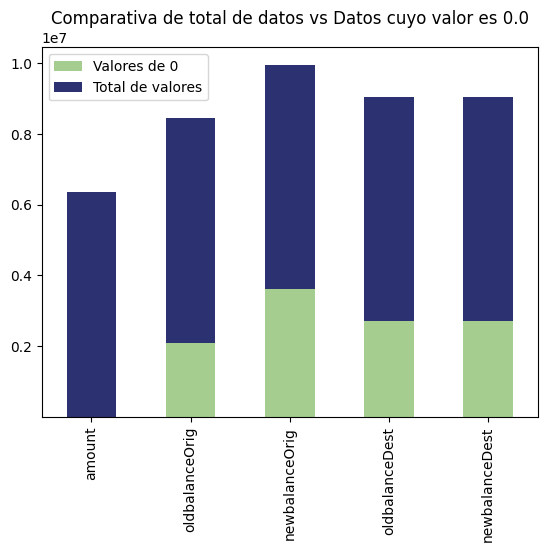

In [ ]:
zeroValues = dict(amount = zerosA, oldbalanceOrig = zerosB, newbalanceOrig = zerosC, oldbalanceDest = zerosD, newbalanceDest = zerosE)
zeros = pd.DataFrame(zeroValues, index=['Valores de 0'])

keys=['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
total = pd.DataFrame({key: len(df) for key in keys}, index=['Total de valores'])

values = pd.concat([zeros, total])

values = values.transpose()

values.plot(kind='bar', stacked=True,
        title='Comparativa de total de datos vs Datos cuyo valor es 0.0', cmap='crest')

In [ ]:
values

,Valores de 0,Total de valores
amount,12,6351193
oldbalanceOrig,2101614,6351193
newbalanceOrig,3603682,6351193
oldbalanceDest,2698585,6351193
newbalanceDest,2698585,6351193


In [ ]:
fraud = (df['isFraud'] == 1).sum()
notFraud = (df['isFraud'] == 1).sum()
isFraudValues = []

ax = plt.pie(typeCount, labels=typeCount.index, autopct='%1.0f%%')
plt.show()

# Análisis de columna type

La única columna con datos de tipo categórico es 'type' que expresa el tipo de transacción hecha. Encontramos que el tipo CASH_OUT representa un 35% del dataframe, seguido de PAYMENT con 34%, CASH_IN con 22%, TRANSFER con 8% y finalmente DEBIT con 1%.

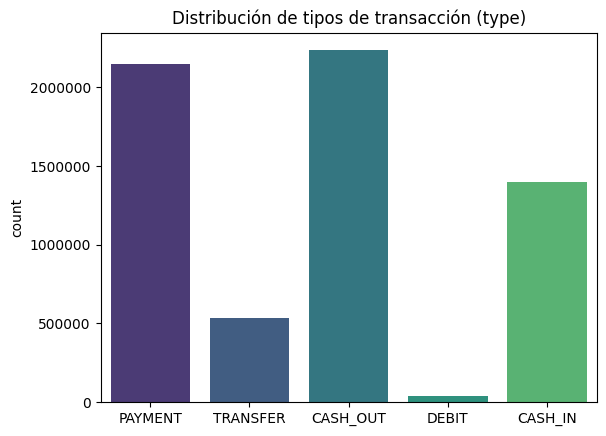

In [ ]:
sns.set_palette(sns.color_palette('viridis'))

ax = sns.countplot(x='type', data=df)
ax.set_title('Distribución de tipos de transacción (type)')
ax.set_xlabel('')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64


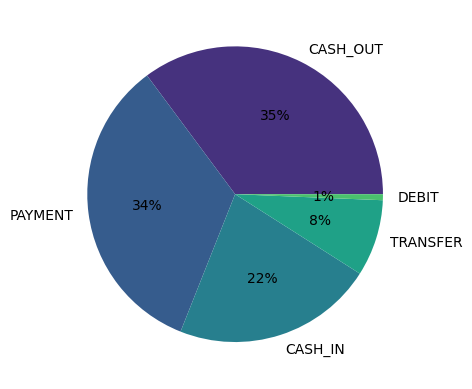

In [ ]:
typeCount = df['type'].value_counts()
print(typeCount)
ax = plt.pie(typeCount, labels=typeCount.index, autopct='%1.0f%%')
plt.show()

# Relación entre variables

**Correlación entre variables en un mapa de calor**

Encontramos que existe una baja relación entre columnas, dado el propósito del análisis se puede concluir que la relación más fuerte (0.46) que corresponde a amount y newbalanceDest no tiene un uso práctico, pues naturalmente la cantidad que es parte de la transacción refleja un cambio en el total crediticio de la cuenta destino.

<ipython-input-122-173277e561db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='magma', linewidths=1);


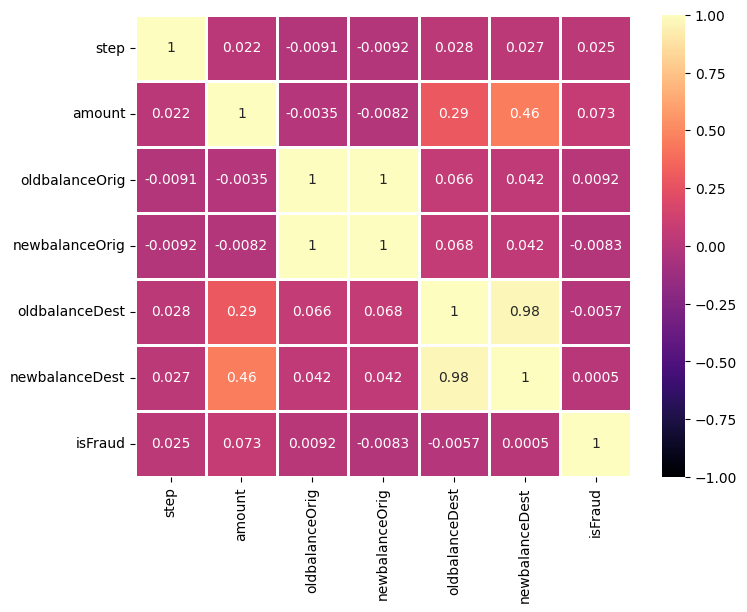

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='magma', linewidths=1);